In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
sample_size = 200
n_input_features = 1
n_iterations = 100

In [3]:
from sklearn.datasets import make_regression

In [4]:

features, target = make_regression(n_samples=sample_size, 
                                   n_features= n_input_features, 
                                   n_informative = n_input_features, 
                                   noise=10)

In [5]:
dataset = pd.DataFrame(features, columns=['feature'])
print(dataset.head())

    feature
0  0.675932
1 -0.632567
2 -0.167595
3  0.434326
4  0.359735


In [6]:
dataset['target'] = pd.DataFrame(target, columns=['target'])
print(dataset.head())

    feature     target
0  0.675932  53.295072
1 -0.632567 -42.132492
2 -0.167595  -8.217830
3  0.434326  31.644706
4  0.359735  36.575504


In [7]:
dataset.head()

,feature,target
0,0.675932,53.295072
1,-0.632567,-42.132492
2,-0.167595,-8.217830
3,0.434326,31.644706
4,0.359735,36.575504


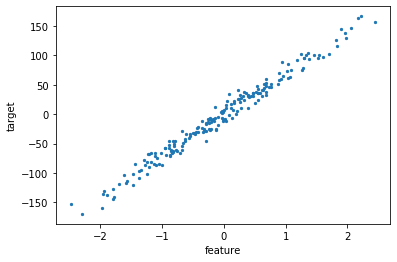

In [8]:
dataset.plot(kind = 'scatter', x = 'feature', y='target', marker='.')

In [9]:
dataset.insert(0,'Ones',1)
dataset.head()

,Ones,feature,target
0,1,0.675932,53.295072
1,1,-0.632567,-42.132492
2,1,-0.167595,-8.217830
3,1,0.434326,31.644706
4,1,0.359735,36.575504


In [10]:
def linreg_cost(X,y_pred,theta):
    inner= np.power(((X*theta.T)-y),2)
    return np.sum(inner)/(2*len(X))

In [11]:
X=dataset[['Ones','feature']]
y= dataset['target']


In [12]:
X.head()

,Ones,feature
0,1,0.675932
1,1,-0.632567
2,1,-0.167595
3,1,0.434326
4,1,0.359735


In [13]:
X=np.matrix(X.values)
y=np.matrix(y.values)
theta = np.matrix(np.array([0,0]))

In [14]:
theta

matrix([[0, 0]])

In [15]:
X.shape, theta.shape,y.shape

((200, 2), (1, 2), (1, 200))

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y.T,test_size=0.30, random_state=40)

In [18]:
linreg_cost(X,y,theta)

473126.2971663313

In [19]:
def grad_desc(X,y,theta,learning_rate, n_iterations):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(n_iterations)
    
    for i in range(n_iterations):
        error = (X*theta.T)-y
        for j in range(parameters):
            term = np.multiply(error,X[:,j])
            temp[0,j] = theta[0,j] - ((learning_rate/len(X))*np.sum(term))
        theta=temp
        cost[i] = linreg_cost(X,y,theta)
    return theta, cost

In [22]:
learning_rate = 0.01
n_iterations = 1000

In [23]:
gradient_descent,cost = grad_desc(X,y,theta,learning_rate, n_iterations)
gradient_descent

matrix([[ 3.96653796e+42, -2.77138529e+42]])

In [24]:
linreg_cost(X,y,gradient_descent)

2.4604812774903176e+87

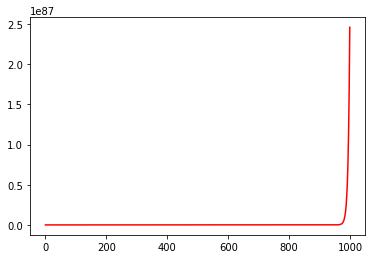

In [25]:
plt.plot(np.arange(n_iterations), cost, 'r')

In [24]:
x= np.linspace(dataset.feature.min(), dataset.feature.max(),100)
f= gradient_descent[0,0]+(gradient_descent[0,1]*x)
fig,ax = plt.subplot(figsize=(12,8))
ax.plot(x,f,'r',label='Prediction')
ax.scatter(data.feature,data.target,label= 'Trainin data')
ax.legend(loc=0)

AttributeError: 'AxesSubplot' object has no property 'figsize'

<Figure size 432x288 with 0 Axes>